# MA3K7 Problem 2. 
# I'm using python to investigate various aspects to our problem
# 1. If we allocate numbers randomly, what is the probability of winning?
# 2. When we create a matrix with non-zero determinant what are the eigenvalues? Investigate the mean of them?
# 3. For the case of a 3x3 matrix can we be sure of being able to win regardless of OPP's starting position?

In [1]:
# imports
import scipy.special
import numpy as np
import random
from matplotlib import pyplot as plt
from itertools import combinations

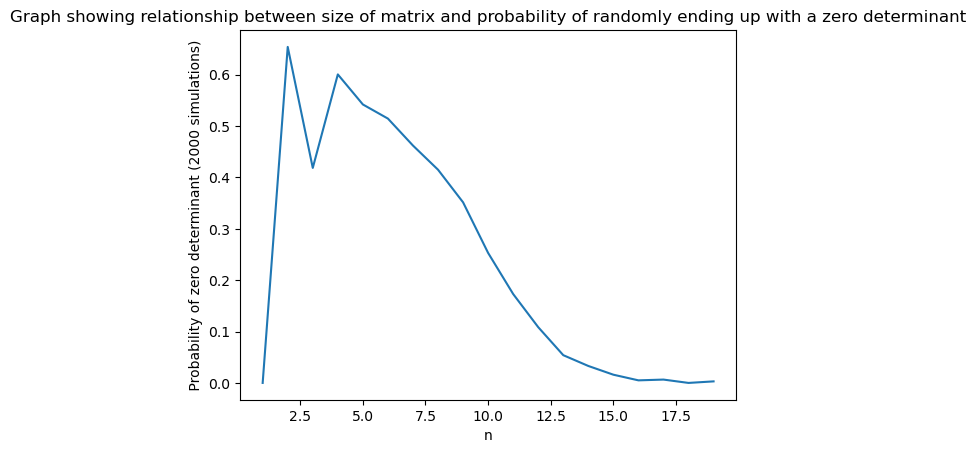

In [2]:
# please note again: I am not optimising my code for speed, it will have slow runtime. It is not important as
# this is a mathematical investigation not a coding project
def generate_rand_matrix(n):
    """Parameters
    ----------
    n : Int
        Integer reprenting the numbers of rows and columns of our matrix we will play the game with
    
    Returns
    -------
    truth: Boolean
        Boolean Representing the truth value of the statement "the determinant of a randomly generated matrix=0"
    eigenvalues: numpy array
        Numpy array containing the eigenvalues of the randomly generated matrix
    """
    # initialsing our matrix
    a = np.zeros((n, n))
    if n % 2 == 1:
        num_ones = n ** 2 // 2 + 1
    else:
        num_ones = n ** 2 // 2 
    
    while num_ones > 0:
        row = random.randint(0, n - 1)
        col = random.randint(0, n - 1)
        
        if a[row][col] == 0:
            a[row][col] = 1
            num_ones -= 1
    truth = bool(np.linalg.det(a) == 0)
    
    eigenvalues=np.linalg.eigvals(a)
    
    return truth,eigenvalues



def random_outcome(n,sims):
    """
    Parameters
    ----------
    n : Int
        Integer reprenting the numbers of rows and columns of our matrix we will play the game with
    sims: int
        The number of random matrices we generate to check determinant criteria of

    Returns
    -------
    prob: float
        The probability of a random matrix filled with 0's and 1's having 0 determinant after sims simulations

    This function is there to hopefully reinforce my intuition that as our matrix gets bigger there become 
    less arrangements such that we win the game(where criteria for winning is we have 0 determinant).
    This is also important in the context of our thought process as it shows that we must think systematically
    about how to place our 0's, we cant simply hope we stumble on a solution. This only works for small cases
    such as n=2,3,4,5
    We note that this outcome is if OPP plays first. if we play first there is one extra zero in the odd case. 
    """
    total_win = 0
    
    
    # we call our function which creates all possible matrices with half of entries 1. 
    # this function returns the number of which has determinant = 0
    
    
    # initialsing our matrix
    for i in range(sims):
        if generate_rand_matrix(n)[0]:
            total_win += 1
        
    prob_approx = total_win / sims
    return prob_approx


def plots(matrix_max_size,sims):
    """
    Function to plot the graph of P(n) vs n
    Parameters
    ----------
    matrix_max_size : Int
        Integer reprenting the maximum n we simulate the probability of 0 determinant with
    Returns
    ----------
    None
    
    """
    prob_win = []
    matrix_size_for_plot =  [i for i in range(1,matrix_max_size)]
    for i in range(1,matrix_max_size):
        prob_win.append(random_outcome(i,sims))
    plt.plot(matrix_size_for_plot,prob_win)
    plt.xlabel("n")
    plt.ylabel(f" Probability of zero determinant ({sims} simulations) ")
    plt.title("Graph showing relationship between size of matrix and probability of randomly ending up with a zero determinant")
    return None
plots(20,2000)

In [3]:
# Comments on first plot:
# Clearly my intuition was correct at least up to a size 20x20 matrix with 2000 simulations. 
# As the matrix becomes bigger it becomes far less likely that we randomly create a determinant 0 matrix. 
# Hence the need for systematically approaching this problem for with Techniques which are less influenced
# by size is important. Basically 3 of our initial approaches which we used for small matrices wont work for
# bigger matrices. our 3 approaches were
# 1. trial and error
# 2. attempting to make each minor determinant = 0
# 3. creating a row composed entirely of 0's.
# In conclusion we should focus more on strategies which generalise nicely to higher dimensions. 
# For example linearity of columns and the rank of the entire matrix. 

# We now approach Q2 from above

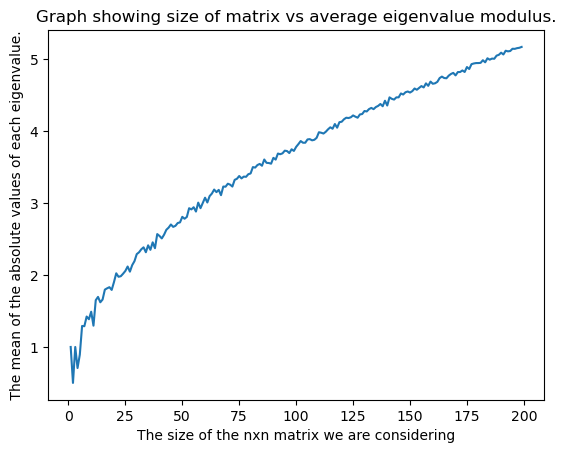

In [4]:
def eigenvaluecheck(n):
    """
    Function that continues running until it generates a matrix with only positive and real-valued eigenvalues. 
    Parameters
    ----------
    n: int
        number representing the dimensions of the square matrix
    Returns
    ----------
    evalues: Numpy array
        The eigenvalues 
    
    """
    stopflag = False
    while not stopflag:
        matrix=generate_rand_matrix(n)
        if matrix[0]!=True:
            stopflag=True
            evalues = matrix[1]
            for i in range(len(evalues)):
                if evalues[i] <= 1.0e-15:
                    stopflag=False
                if np.iscomplex(evalues[i]):
                    stopflag=False
    return evalues


def eigenvaluecheck2(n):
    """
    Function to check what the eigenvalues of our created matrices are when the determinant is non-zero and 
    all eigenvalues are non-zero,real and positive.
    Parameters
    ----------
    n: int
        number representing the dimensions of the square matrix
    Returns
    ----------
    mean: float
         Average modulus of the eigenvalues
    
    """
    our_matrix=generate_rand_matrix(n)
    evalues_abs=np.abs(np.array(our_matrix[1]))
    mean=np.mean(evalues_abs)
    return mean

def e_plots(max_n):
    nvals=[i for i in range(1,max_n)]
    evals_mean=[eigenvaluecheck2(i) for i in range(1,max_n)]
    
    plt.plot(nvals,evals_mean)
    plt.xlabel("The size of the nxn matrix we are considering")
    plt.ylabel(" The mean of the absolute values of each eigenvalue. ")
    plt.title("Graph showing size of matrix vs average eigenvalue modulus.")
    return 
e_plots(200)


In [5]:
# Comments on plot. 
# This growth of the mean modulus of eigenvalues seems logarithmic. Very Cool!
# THis might add some further intuition to why it gets less probable to randomly create a matrix satisfying 
# det(A)=0 as each time we require an eigenvalue to equal zero which will be further from the mean in a sense
# Super cool even if not mathematically rigourous. 

In [6]:
def generate_matrices_with_specified_entry(entry_row, entry_col):
    """ 
    Function to create all possible matrices with the first 1 entry position being passed as a parameter. 
    Parameters
    ----------
    entry_row: int
        The row part of the first position
    entry_col: int 
        The column part of the first position
    Returns 
    ----------
    all_matrices: List
        A list of all possible matrices that can be created through this game.
    """
    # Create a list representing the indices of the 3x3 matrix
    indices = [(i, j) for i in range(3) for j in range(3)]

    # Filter out the specified entry
    indices.remove((entry_row, entry_col))

    # Initialize a list to store all matrices
    all_matrices = []

    # Generate all combinations of 4 zeros and 4 ones
    for comb in combinations(indices, 4):
        # Create the 3x3 matrix with the specified entry and the selected values
        matrix = [[0] * 3 for _ in range(3)]
        matrix[entry_row][entry_col] = 1

        for i, j in comb:
            matrix[i][j] = 1

        all_matrices.append(matrix)

    return all_matrices



# now all we need to do is iterate through 3 starting positions and check one of the created matrices has 0
# determinant for each starting position
def checker():
    """
    Function which checks that we can always win for 3x3 square matrix when OPP goes first
    Parameters
    ----------
    
    Returns
    ----------
    Boolean represnting whether we can always win or not. 
    
    
    """
    indices_to_check=[(1,1),(0,0),(0,1)]
    total=0
    for index in indices_to_check:
        matrices_to_check=generate_matrices_with_specified_entry(index[0], index[1])
        for matrix in matrices_to_check:
            if np.linalg.det(np.array(matrix))==0:
                total+=1
                break
    if total!=3:
        return False
    else:
        return True
print(f"It is {checker()} that we can win regardless of where OPP places his first 1")       

It is True that we can win regardless of where OPP places his first 1
